# Q5 Assumed Density Filtering
### Q5.1 Pre-processing and variables

In [5]:
# Q5 Assumed density filtering
# import preprocessing function and Gibbs sampler function
from Preprocessing_serieA_function import preprocess_serieA_no_draws
from Gibbs_sampler_function import gibbs_sampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from df_to_dic_script import df_to_dictionary as df_to_dic

# load data
data = pd.read_csv('SerieA_dataset.csv')
print(data.head())

# preprocess data
data_preprocessed = preprocess_serieA_no_draws(data, dataset_name='SerieA', remove_draws=False)
print('\nShape of preprocessed data: ', data_preprocessed.shape)

# shuffle data
shuffled_data = data_preprocessed.copy()
shuffled_data = shuffled_data.sample(frac=1).reset_index(drop=True)

# Create team dictionary
teams_dictionary = df_to_dic(data_preprocessed)
shuffled_teams_dictionary = df_to_dic(shuffled_data)


game1 = data_preprocessed.iloc[0, :]
print(f'\nFirst game:\n {game1}')

   yyyy-mm-dd  HH:MM     team1     team2  score1  score2
0  2018-08-18  18:00    Chievo  Juventus       2       3
1  2018-08-18  20:30     Lazio    Napoli       1       2
2  2018-08-19  18:00    Torino      Roma       0       1
3  2018-08-19  20:30  Sassuolo     Inter       1       0
4  2018-08-19  20:30     Parma   Udinese       2       2
      team1     team2  score_diff  y
0    Chievo  Juventus          -1 -1
1     Lazio    Napoli          -1 -1
2    Torino      Roma          -1 -1
3  Sassuolo     Inter           1  1
4     Parma   Udinese           0  0

Shape of preprocessed data:  (380, 4)

First game:
 team1           Chievo
team2         Juventus
score_diff          -1
y                   -1
Name: 0, dtype: object


# Q.6
### Q6.1 prediction function

### Q5.2 Assumed Density Filtering (ADF) function

## Q5 & Q6: Run functions

In [2]:
# Run ADF on data
# Assumed density filtering (ADF)
from ADF_script import ADF

dic1, predictions1= ADF(teams_dictionary, data_preprocessed)

# Run ADP on shuffled data
dic_shuffled, predictions_shuffled = ADF(shuffled_teams_dictionary, shuffled_data)

# Results:
### Team ranking changes after shuffle
#### prediction rate of one-step-head = 0.64, better than random guessing(0.5)

In [3]:
# Create dataframe of means and variances an sort by means
from numpy import sign
from sklearn.metrics import accuracy_score
teams_df = pd.DataFrame(dic1, index=['mean', 'variance']).T
teams_df = teams_df.sort_values(by=['mean'], ascending=False)
print('Teams after the season, no shuffle:')
print(teams_df)

# Calculate prediction rate
from sklearn.metrics import accuracy_score
y_true = sign(data_preprocessed['score_diff']).tolist()
prediction_rate = accuracy_score(y_true, predictions1)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate}')

# prediction rate of last 60 games
y_true_last_60 = y_true[-60:]
predictions_last_60 = predictions1[-60:]
prediction_rate_last_60 = accuracy_score(y_true_last_60, predictions_last_60)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60}')


# create dataframe of shuffled means and variances
teams_df_shuffled = pd.DataFrame(dic_shuffled, index=['mean', 'variance']).T
teams_df_shuffled = teams_df_shuffled.sort_values(by=['mean'], ascending=False)
print('\nTeams after the season, with shuffle:')
print(teams_df_shuffled)

# Calculate prediction rate
y_true_shuffled = sign(shuffled_data['score_diff']).tolist()
prediction_rate_shuffled = accuracy_score(y_true_shuffled, predictions_shuffled)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate_shuffled}')

# prediction rate of last 60 games
y_true_last_60_shuffled = y_true_shuffled[-60:]
predictions_last_60_shuffled = predictions_shuffled[-60:]
prediction_rate_last_60_shuffled = accuracy_score(y_true_last_60_shuffled, predictions_last_60_shuffled)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60_shuffled}')


Teams after the season, no shuffle:
                 mean  variance
Roma        30.109623  0.091047
Juventus    29.141488  0.286165
Atalanta    28.317403  0.019497
Torino      27.726008  0.105435
Napoli      26.645248  0.761413
Milan       26.611392  0.033359
Bologna     26.479352  0.174420
Inter       26.120102  0.033198
Udinese     25.689737  0.084071
Sampdoria   25.640312  1.441031
Lazio       24.669807  0.077209
Empoli      23.906797  0.547086
Sassuolo    23.893443  0.023913
Spal        23.028497  0.147756
Parma       21.833917  0.037649
Cagliari    21.728120  0.069674
Frosinone   21.224516  0.031452
Chievo      20.932573  0.017307
Fiorentina  20.727304  0.073459
Genoa       20.625023  0.028188

Prediction rate of One-Step-Ahead prediction: 0.47368421052631576

Prediction rate of One-Step-Ahead prediction for last 60 games: 0.45

Teams after the season, with shuffle:
                 mean  variance
Juventus    27.181214  0.018296
Milan       25.769716  0.029270
Napoli      25.55967

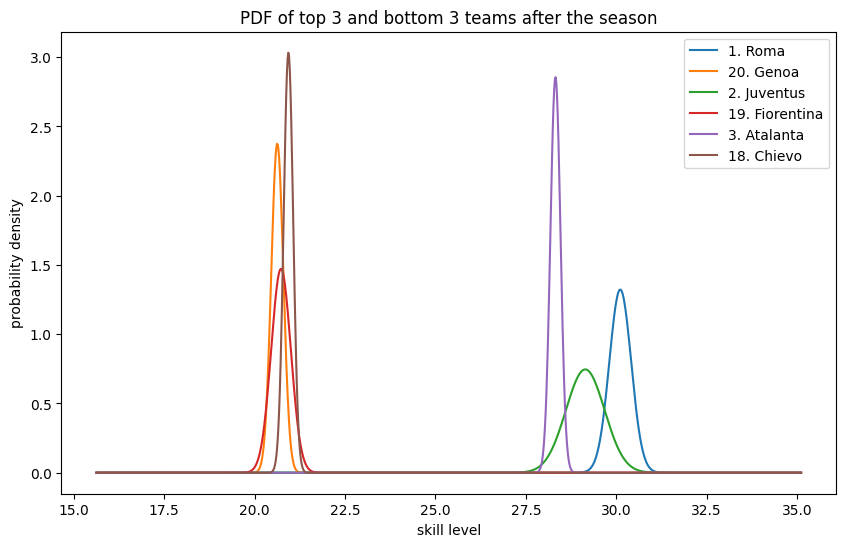

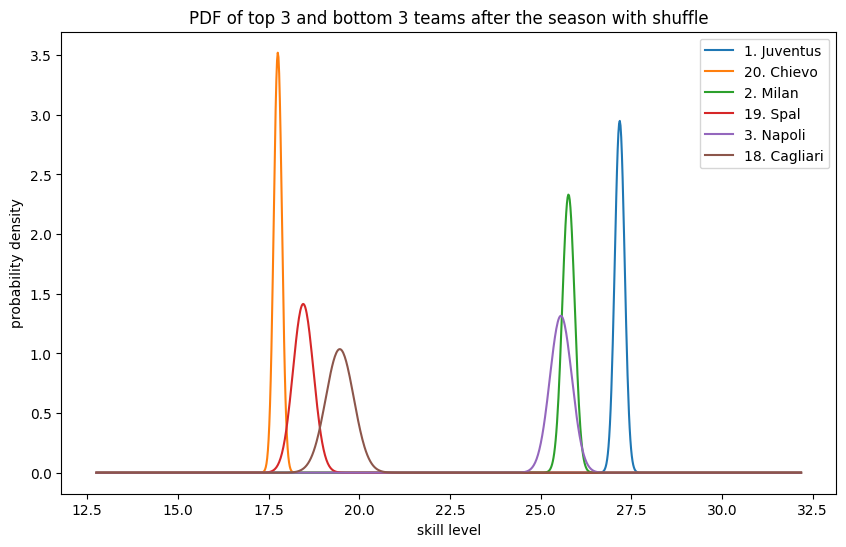

In [4]:
# Plot the pdf of the three top teams and the three bottom teams

plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df['mean'])-5, max(teams_df['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df.iloc[i, 0], np.sqrt(teams_df.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df.iloc[-i-1, 0], np.sqrt(teams_df.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df)-i}. {teams_df.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams after the season')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()

# Plot the pdf of the three top teams and the three bottom teams after shuffle

plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df_shuffled['mean'])-5, max(teams_df_shuffled['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df_shuffled.iloc[i, 0], np.sqrt(teams_df_shuffled.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df_shuffled.iloc[-i-1, 0], np.sqrt(teams_df_shuffled.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df_shuffled.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df_shuffled)-i}. {teams_df_shuffled.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams after the season with shuffle')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()
